In [1]:
# ==========================
# –û—Å–Ω–æ–≤–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
# ==========================
import numpy as np
import pandas as pd
import warnings

# ==========================
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ==========================
# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# ==========================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

# ==========================
# –ú–æ–¥–µ–ª–∏ –∏ –æ–±—É—á–µ–Ω–∏–µ
# ==========================
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor,
    StackingRegressor, AdaBoostRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# ==========================
# –ú–µ—Ç—Ä–∏–∫–∏
# ==========================
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
)

# ==========================
# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –±—É—Å—Ç–∏–Ω–≥–∞
# ==========================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool

# ==========================
# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
# ==========================
from scipy.stats import f_oneway


In [2]:
df = pd.read_csv("df.csv")
df_bin = pd.read_csv("df_bin.csv")
df_cut = pd.read_csv("df_cut.csv")
df_cut_bin = pd.read_csv("df_cut_bin.csv")

–°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏

In [4]:
!pip install catboost

In [5]:
df = df.drop(columns=['CC50, mM'])
df_bin = df_bin.drop(columns=['CC50, mM'])
df_cut = df_cut.drop(columns=['CC50, mM'])
df_cut_bin = df_cut_bin.drop(columns=['CC50, mM'])
df = df.drop(columns=['SI'])
df_bin = df_bin.drop(columns=['SI'])
df_cut = df_cut.drop(columns=['SI'])
df_cut_bin = df_cut_bin.drop(columns=['SI'])
df = df.drop(columns=['log_SI'])
df_bin = df_bin.drop(columns=['log_SI'])
df_cut = df_cut.drop(columns=['log_SI'])
df_cut_bin = df_cut_bin.drop(columns=['log_SI'])
df = df.drop(columns=['IC50, mM'])
df_bin = df_bin.drop(columns=['IC50, mM'])
df_cut = df_cut.drop(columns=['IC50, mM'])
df_cut_bin = df_cut_bin.drop(columns=['IC50, mM'])
df = df.drop(columns=['log_IC50'])
df_bin = df_bin.drop(columns=['log_IC50'])
df_cut = df_cut.drop(columns=['log_IC50'])
df_cut_bin = df_cut_bin.drop(columns=['log_IC50'])

=== Evaluation on df ===


Cross-validation (234 features): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [07:51<00:00, 52.37s/it] 


=== Evaluation on df_cut ===


Cross-validation (158 features): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [04:39<00:00, 31.03s/it]


=== Evaluation on df_bin ===


Cross-validation (234 features): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [07:28<00:00, 49.78s/it] 


=== Evaluation on df_cut_bin ===


Cross-validation (94 features): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [03:53<00:00, 25.95s/it]


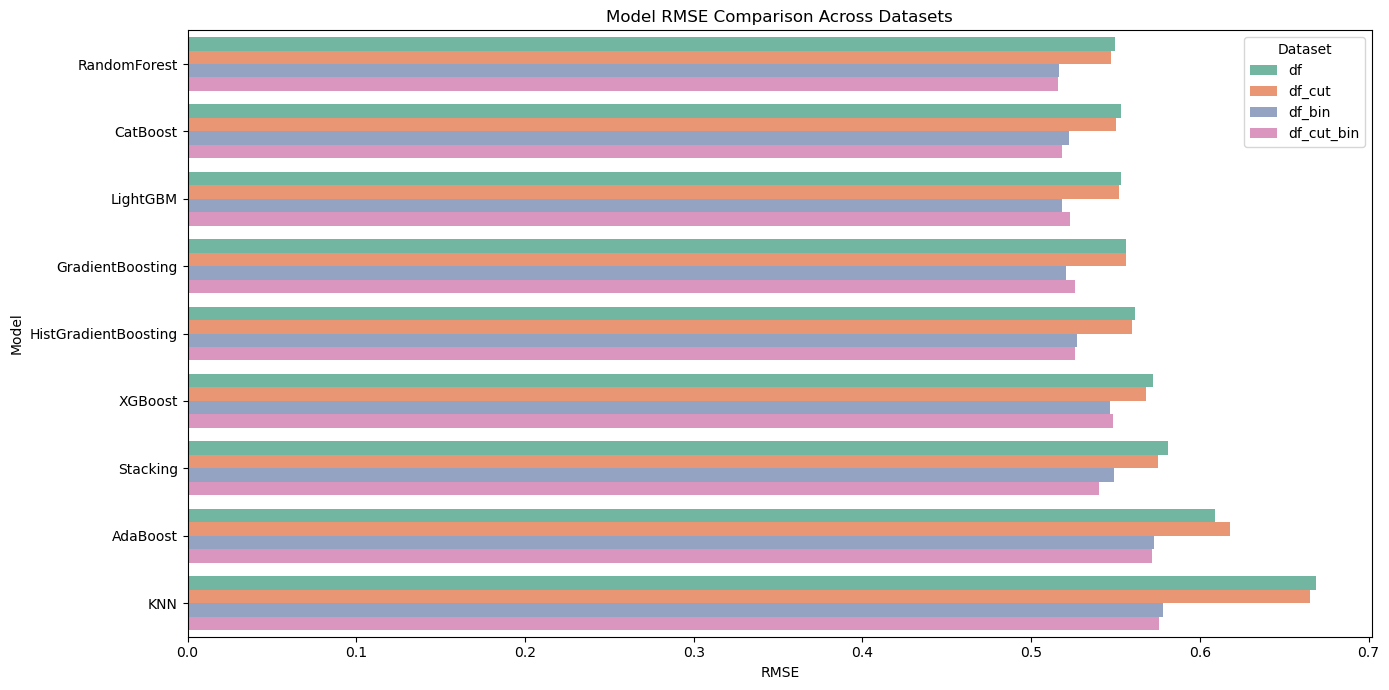

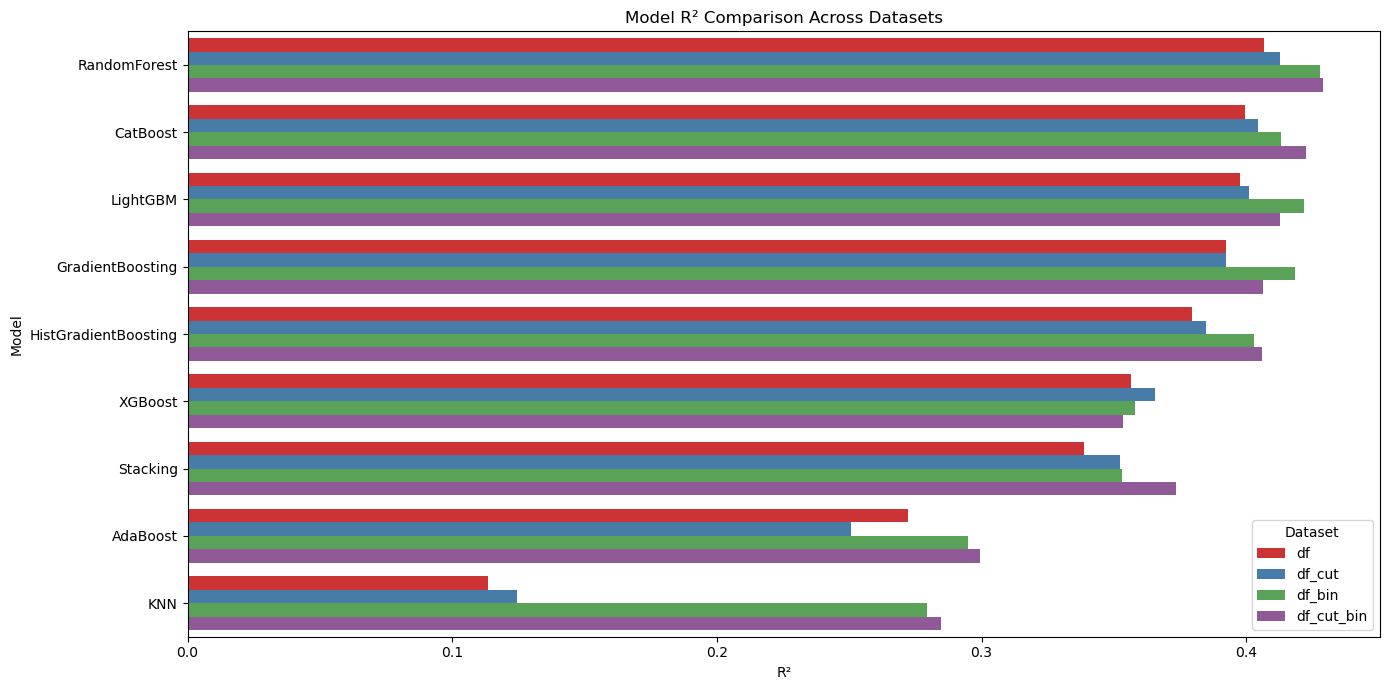


Model metrics comparison:
                         MAE                               RMSE          \
Dataset                   df  df_bin  df_cut df_cut_bin      df  df_bin   
Model                                                                     
AdaBoost              0.4840  0.4695  0.4894     0.4676  0.6086  0.5729   
CatBoost              0.3899  0.3773  0.3875     0.3748  0.5531  0.5225   
GradientBoosting      0.3918  0.3798  0.3925     0.3847  0.5563  0.5204   
HistGradientBoosting  0.3851  0.3714  0.3823     0.3710  0.5618  0.5269   
KNN                   0.4559  0.3981  0.4533     0.3963  0.6687  0.5782   
LightGBM              0.3758  0.3625  0.3761     0.3647  0.5535  0.5185   
RandomForest          0.3841  0.3721  0.3843     0.3726  0.5496  0.5163   
Stacking              0.4429  0.4294  0.4362     0.4217  0.5811  0.5492   
XGBoost               0.3864  0.3766  0.3844     0.3799  0.5722  0.5466   

                                             R¬≤                        

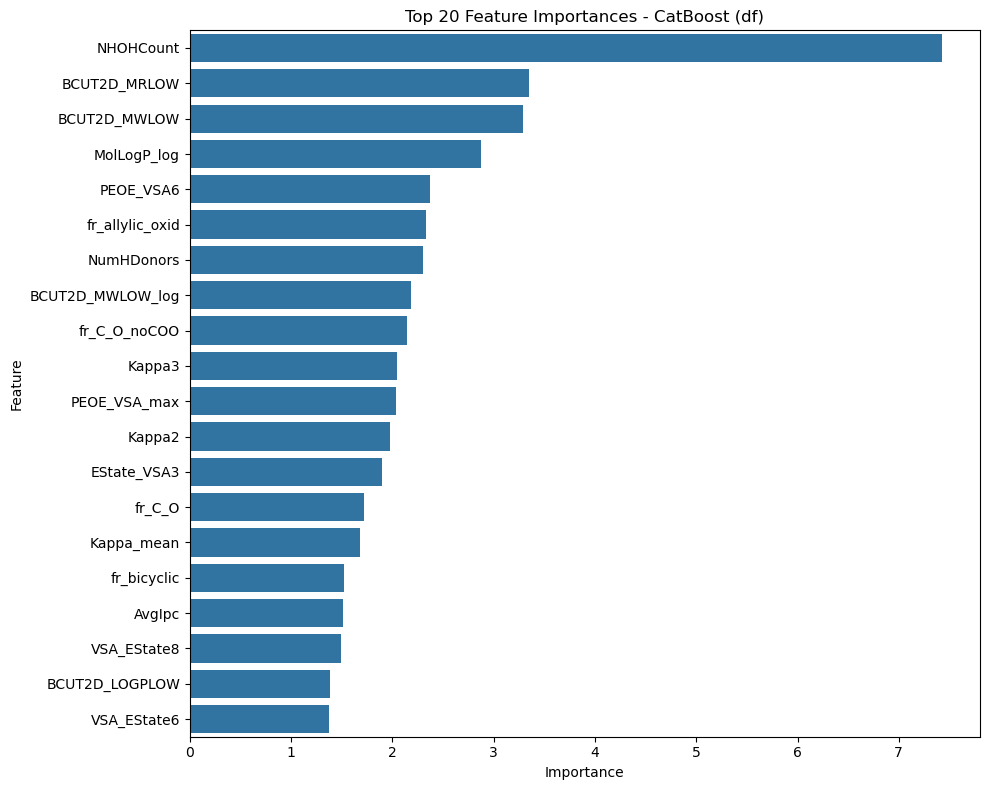

Best model on df by RMSE: RandomForest


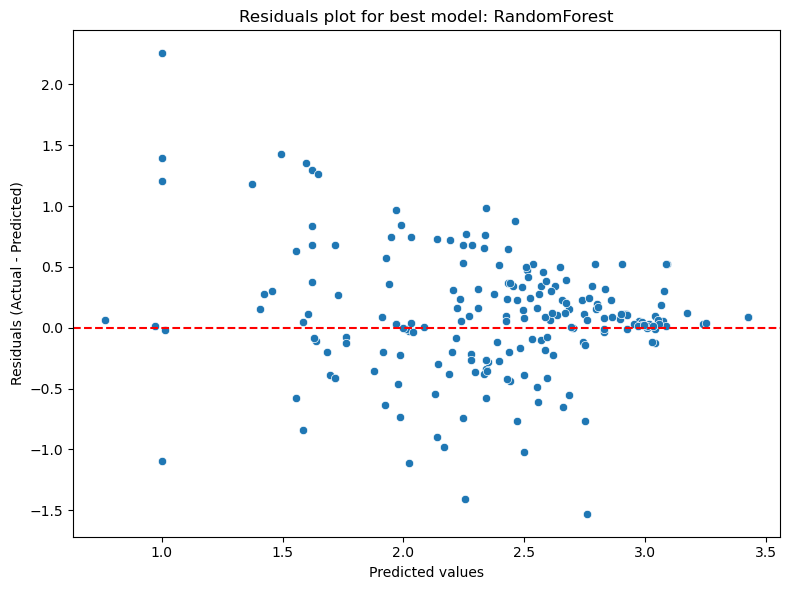

In [12]:
warnings.filterwarnings("ignore")

# –û—á–∏—Å—Ç–∫–∞ –∏–º—ë–Ω –∫–æ–ª–æ–Ω–æ–∫ –∏ –∑–∞–º–µ–Ω–∞ inf –Ω–∞ nan
for d in [df, df_cut, df_bin, df_cut_bin]:
    d.columns = d.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    d.replace([np.inf, -np.inf], np.nan, inplace=True)

estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42)),
]

final_estimator = LinearRegression()
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

models = {
    "KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(
        random_state=42,
        colsample_bytree=0.65,
        learning_rate=0.102,
        max_depth=6,
        min_child_samples=16,
        n_estimators=451,
        num_leaves=25,
        reg_alpha=0.98,
        reg_lambda=0.44,
        subsample=0.65,
        verbose=-1
    ),
    "CatBoost": CatBoostRegressor(
        verbose=0,
        random_state=42,
        bagging_temperature=0.13,
        depth=4,
        iterations=626,
        l2_leaf_reg=4.2,
        learning_rate=0.04
    ),
    "Stacking": stacking_model
}


def evaluate_models(df_input, y_col='log_CC50'):
    df_eval = df_input.copy()
    df_eval = df_eval.drop(columns=['Unnamed_0'], errors='ignore')

    X = df_eval.drop(columns=[y_col])
    y = df_eval[y_col]

    X.replace([np.inf, -np.inf], np.nan, inplace=True)

    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    scaler = RobustScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for name, model in tqdm(models.items(), desc=f"Cross-validation ({df_input.shape[1]} features)"):
        try:
            cv_results = cross_validate(
                model, X_scaled, y,
                cv=kf,
                scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2', 'neg_median_absolute_error'],
                return_train_score=False,
                n_jobs=-1
            )

            mae_mean = -np.mean(cv_results['test_neg_mean_absolute_error'])
            mse_mean = -np.mean(cv_results['test_neg_mean_squared_error'])
            rmse_mean = np.sqrt(mse_mean)
            r2_mean = np.mean(cv_results['test_r2'])
            medae_mean = -np.mean(cv_results['test_neg_median_absolute_error'])

            results.append({
                "Model": name,
                "MAE": mae_mean,
                "MSE": mse_mean,
                "RMSE": rmse_mean,
                "MedAE": medae_mean,
                "R¬≤": r2_mean
            })
        except Exception as e:
            print(f"Error in model {name}: {e}")
    return pd.DataFrame(results).sort_values(by="RMSE"), X_scaled, y, imputer, scaler

# –û—Ü–µ–Ω–∫–∞ –≤—Å–µ—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ —Å–±–æ—Ä —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("=== Evaluation on df ===")
results_df, X_df_scaled, y_df, imputer_df, scaler_df = evaluate_models(df)
results_df['Dataset'] = 'df'

print("=== Evaluation on df_cut ===")
results_df_cut, X_cut_scaled, y_cut, imputer_cut, scaler_cut = evaluate_models(df_cut)
results_df_cut['Dataset'] = 'df_cut'

print("=== Evaluation on df_bin ===")
results_df_bin, X_bin_scaled, y_bin, imputer_bin, scaler_bin = evaluate_models(df_bin)
results_df_bin['Dataset'] = 'df_bin'

print("=== Evaluation on df_cut_bin ===")
results_df_cut_bin, X_cut_bin_scaled, y_cut_bin, imputer_cut_bin, scaler_cut_bin = evaluate_models(df_cut_bin)
results_df_cut_bin['Dataset'] = 'df_cut_bin'

comparison_df = pd.concat([results_df, results_df_cut, results_df_bin, results_df_cut_bin], ignore_index=True)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è RMSE
plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_df, x='RMSE', y='Model', hue='Dataset', palette='Set2')
plt.title("Model RMSE Comparison Across Datasets")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è R¬≤
plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_df, x='R¬≤', y='Model', hue='Dataset', palette='Set1')
plt.title("Model R¬≤ Comparison Across Datasets")
plt.xlabel("R¬≤")
plt.ylabel("Model")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

print("\nModel metrics comparison:")
print(comparison_df.pivot_table(index="Model", columns="Dataset", values=["RMSE", "R¬≤", "MAE"]).round(4))

# --- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è CatBoost –Ω–∞ df (–ø—Ä–∏–º–µ—Ä) ---
cat_model = models['CatBoost']
cat_model.fit(X_df_scaled, y_df)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importances = cat_model.get_feature_importance(Pool(X_df_scaled, label=y_df))
feat_imp_df = pd.DataFrame({
    'Feature': X_df_scaled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title("Top 20 Feature Importances - CatBoost (df)")
plt.tight_layout()
plt.show()

# --- –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ df ---
# –û–ø—Ä–µ–¥–µ–ª–∏–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –ø–æ RMSE –Ω–∞ df
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"Best model on df by RMSE: {best_model_name}")

best_model = models[best_model_name]

# –î–ª—è –≥—Ä–∞—Ñ–∏–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω—É–∂–Ω–∞ –æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled, y_df, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residuals plot for best model: {best_model_name}')
plt.tight_layout()
plt.show()

# --- –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ Excel –∏ PDF ---
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('regression_evaluation_report_CC50.pdf') as pdf:
    # RMSE Plot
    plt.figure(figsize=(14, 7))
    sns.barplot(data=comparison_df, x='RMSE', y='Model', hue='Dataset', palette='Set2')
    plt.title("Model RMSE Comparison Across Datasets")
    plt.xlabel("RMSE")
    plt.ylabel("Model")
    plt.legend(title="Dataset")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # R¬≤ Plot
    plt.figure(figsize=(14, 7))
    sns.barplot(data=comparison_df, x='R¬≤', y='Model', hue='Dataset', palette='Set1')
    plt.title("Model R¬≤ Comparison Across Datasets")
    plt.xlabel("R¬≤")
    plt.ylabel("Model")
    plt.legend(title="Dataset")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Feature importance CatBoost
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
    plt.title("Top 20 Feature Importances - CatBoost (df)")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Residuals plot best model
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'Residuals plot for best model: {best_model_name}')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # –¢–∞–±–ª–∏—á–Ω–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.axis('off')
    ax.axis('tight')

    table_data = comparison_df.pivot_table(
        index="Model",
        columns="Dataset",
        values=["RMSE", "R¬≤", "MAE"]
    ).round(4)

    tbl = ax.table(
        cellText=table_data.values,
        colLabels=[f'{metric}_{ds}' for metric, ds in table_data.columns],
        rowLabels=table_data.index,
        loc='center',
        cellLoc='center'
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)
    ax.set_title("Model metrics comparison")
    pdf.savefig()
    plt.close()

with pd.ExcelWriter("regression_comparison_metrics_CC50.xlsx") as writer:
    results_df.to_excel(writer, sheet_name="df", index=False)
    results_df_cut.to_excel(writer, sheet_name="df_cut", index=False)
    results_df_bin.to_excel(writer, sheet_name="df_bin", index=False)
    results_df_cut_bin.to_excel(writer, sheet_name="df_cut_bin", index=False)
    comparison_df.to_excel(writer, sheet_name="Comparison", index=False)


–¥–≤—É—Ö—ç—Ç–∞–ø–Ω–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ LightGBM –Ω–∞ –¥–∞–Ω–Ω—ã—Ö df__bin: —Å–Ω–∞—á–∞–ª–∞ RandomizedSearchCV –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∑–∞—Ç–µ–º GridSearchCV –¥–ª—è –µ—ë —É—Ç–æ—á–Ω–µ–Ω–∏—è

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import randint, uniform
from lightgbm import LGBMRegressor
from tqdm import tqdm

# --- 1. –î–∞–Ω–Ω—ã–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ ---

X = df_bin.drop(columns=['log_CC50'])
y = df_bin['log_CC50']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# --- 2. –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å ---
base_model = LGBMRegressor(random_state=42)

# --- 3. –ú–µ—Ç—Ä–∏–∫–∏ ---
scoring = {
    'rmse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# --- 4. RandomizedSearchCV ---
param_dist = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(300, 800),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0)
}

print(" –ó–∞–ø—É—Å–∫ RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring=scoring,
    refit='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

with tqdm(total=1, desc="RandomizedSearchCV") as pbar:
    random_search.fit(X_train, y_train)
    pbar.update(1)

print(" –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV):")
print(random_search.best_params_)

# --- 5. GridSearchCV ‚Äî —Ç–æ–Ω–∫–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ ---
best_params = random_search.best_params_
param_grid = {
    'num_leaves': sorted(list(set([
        best_params['num_leaves'] - 10, best_params['num_leaves'], best_params['num_leaves'] + 10
    ]))),
    'max_depth': sorted(list(set([
        best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1
    ]))),
    'learning_rate': [round(best_params['learning_rate'] * r, 3) for r in [0.8, 1.0, 1.2]],
    'n_estimators': [best_params['n_estimators'] - 100, best_params['n_estimators'], best_params['n_estimators'] + 100],
    'min_child_samples': sorted(list(set([
        best_params['min_child_samples'] - 10, best_params['min_child_samples'], best_params['min_child_samples'] + 10
    ]))),
    'subsample': [round(best_params['subsample'] * r, 2) for r in [0.8, 1.0]],
    'colsample_bytree': [round(best_params['colsample_bytree'] * r, 2) for r in [0.8, 1.0]],
    'reg_alpha': [round(best_params['reg_alpha'] * r, 2) for r in [0.8, 1.0, 1.2]],
    'reg_lambda': [round(best_params['reg_lambda'] * r, 2) for r in [0.8, 1.0, 1.2]]
}

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö) –∑–Ω–∞—á–µ–Ω–∏–π
for key, vals in param_grid.items():
    param_grid[key] = sorted(list(set([v for v in vals if v >= 0])))

print("\n –ó–∞–ø—É—Å–∫ GridSearchCV...")
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='r2',
    cv=3,
    n_jobs=-1,
    return_train_score=True
)

with tqdm(total=1, desc="GridSearchCV") as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update(1)

print(" –¢–æ—á–Ω–æ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearchCV):")
print(grid_search.best_params_)

# --- 6. –û—Ü–µ–Ω–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ ---
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print("\n –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R¬≤:   {r2_test:.4f}")

# --- 7. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ---
results = {
    "best_params_random": random_search.best_params_,
    "best_params_grid": grid_search.best_params_,
    "rmse_test": rmse_test,
    "r2_test": r2_test
}

with open("results_lgbm.json", "w") as f:
    json.dump(results, f, indent=4)

print("\n –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ results_lgbm.json")

# --- 8. –ì—Ä–∞—Ñ–∏–∫ Actual vs Predicted ---
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('True log(CC50)')
plt.ylabel('Predicted log(CC50)')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.savefig("CC50_regression_actual_vs_predicted_lgbm.png")
plt.show()

# --- 9. Feature Importance ---
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 30))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.savefig("CC50_regression_feature_importance_lgbm.png")
plt.show()


 –ó–∞–ø—É—Å–∫ RandomizedSearchCV...


RandomizedSearchCV:   0%|          | 0/1 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [10]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import joblib

# –ö–æ–ø–∏—Ä—É–µ–º –∏ –æ—á–∏—â–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df_copy = df.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ CatBoost
catboost_params = {
    'verbose': 0,
    'random_state': 42,
    'bagging_temperature': 0.13,
    'depth': 4,
    'iterations': 626,
    'l2_leaf_reg': 4.2,
    'learning_rate': 0.04
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = CatBoostRegressor(**catboost_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

catboost_model_eval = CatBoostRegressor(**catboost_params)
catboost_model_eval.fit(X_train, y_train)

y_pred = catboost_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50): Residuals plot - CatBoost evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.close()

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
catboost_model_final = CatBoostRegressor(**catboost_params)
catboost_model_final.fit(X_imputed, y)

feature_importances = catboost_model_final.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("log(CC50): Top 30 Feature Importances - CatBoost Final Model")
plt.tight_layout()
plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
joblib.dump(catboost_model_final, 'regression_CC50_catboost_final_model_df_to_SI_class.pkl')
print(" –ú–æ–¥–µ–ª—å CatBoost —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.")


Running 5-fold cross-validation...
Fold 1 R¬≤: 0.4028
Fold 2 R¬≤: 0.4361
Fold 3 R¬≤: 0.3383
Fold 4 R¬≤: 0.4615
Fold 5 R¬≤: 0.3798

Cross-validation results:
MAE: 0.3881 ¬± 0.0143
RMSE: 0.5508 ¬± 0.0233
R¬≤: 0.4037 ¬± 0.0430

Test set performance:
MAE: 0.3725
MSE: 0.2705
RMSE: 0.5201
MedAE: 0.2284
R¬≤: 0.3955
‚úÖ –ú–æ–¥–µ–ª—å CatBoost —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞.


In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib

# –ö–æ–ø–∏—Ä—É–µ–º –∏ –æ—á–∏—â–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df_copy = df_bin.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ LightGBM
lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)

y_pred = lgb_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50): Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_plot.png")
plt.close()

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("log(CC50): Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_feature_importance_top30.png")
plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
joblib.dump(lgb_model_final, 'regression_CC50_lightgbm_final_model_bin.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_bin.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(CC50)_lightgbm_feature_importance_top30.png'")


Running 5-fold cross-validation...
Fold 1 R¬≤: 0.4030
Fold 2 R¬≤: 0.3843
Fold 3 R¬≤: 0.3583
Fold 4 R¬≤: 0.4935
Fold 5 R¬≤: 0.4095

Cross-validation results:
MAE: 0.3675 ¬± 0.0105
RMSE: 0.5237 ¬± 0.0189
R¬≤: 0.4097 ¬± 0.0455

Test set performance:
MAE: 0.3540
MSE: 0.2583
RMSE: 0.5082
MedAE: 0.2433
R¬≤: 0.4030
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_bin.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(CC50)_lightgbm_feature_importance_top30.png'


In [20]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib  # –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏, –∑–∞–º–µ–Ω—è–µ–º inf –Ω–∞ nan
df_copy = df.copy()

df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# –†–∞–∑–¥–µ–ª—è–µ–º X –∏ y
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ (RobustScaler)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ LightGBM
lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è —Å KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)

y_pred = lgb_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–µ
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_plot.png")
plt.close()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ)
lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()
plt.savefig("log(–°–°50)_lightgbm_feature_importance_top30.png")
plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
joblib.dump(lgb_model_final, 'regression_CC50_lightgbm_final_model_df_toIC50_reg.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'")


Running 5-fold cross-validation...
Fold 1 R¬≤: 0.3876
Fold 2 R¬≤: 0.3830
Fold 3 R¬≤: 0.3456
Fold 4 R¬≤: 0.4816
Fold 5 R¬≤: 0.3944

Cross-validation results:
MAE: 0.3745 ¬± 0.0086
RMSE: 0.5529 ¬± 0.0175
R¬≤: 0.3984 ¬± 0.0449

Test set performance:
MAE: 0.3582
MSE: 0.2740
RMSE: 0.5234
MedAE: 0.2524
R¬≤: 0.3876
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'


In [42]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib  # –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏, –∑–∞–º–µ–Ω—è–µ–º inf –Ω–∞ nan
df_copy = df_cut.copy()

df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# –†–∞–∑–¥–µ–ª—è–µ–º X –∏ y
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ (RobustScaler)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ LightGBM
lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è —Å KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)

y_pred = lgb_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–µ
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()

plt.close()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ)
lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()

plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏

joblib.dump(lgb_model_final, 'regression_CC50_random_forest_df_to_IC50_class.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'")


Running 5-fold cross-validation...
Fold 1 R¬≤: 0.3780
Fold 2 R¬≤: 0.3804
Fold 3 R¬≤: 0.3505
Fold 4 R¬≤: 0.4816
Fold 5 R¬≤: 0.3900

Cross-validation results:
MAE: 0.3769 ¬± 0.0086
RMSE: 0.5539 ¬± 0.0163
R¬≤: 0.3961 ¬± 0.0447

Test set performance:
MAE: 0.3620
MSE: 0.2783
RMSE: 0.5275
MedAE: 0.2467
R¬≤: 0.3780
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'


In [ ]:
- –¥–æ–±–∞–≤–ª—è–µ–º –ø—Ä–µ–¥–∞—Å–∫–∞–∑–∞–Ω–Ω—ã–π log(IC50)

In [52]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib  # –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏/—Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π

# === –®–ê–ì 1: –ö–æ–ø–∏—Ä—É–µ–º df_cut_bin –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º ===
df_copy = df_cut_bin.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# === –®–ê–ì 2: –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50 —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å ===
print("–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...")

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
ic50_model = joblib.load('regression_IC50_catboost_final_model_cut_bin.pkl')

# –£–±–∏—Ä–∞–µ–º –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π log_IC50 –∏–∑ df_copy, –µ—Å–ª–∏ –≤–¥—Ä—É–≥ —É–∂–µ –µ—Å—Ç—å
if 'log_IC50' in df_copy.columns:
    df_copy.drop(columns=['log_IC50'], inplace=True)

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–∏ IC50
X_ic50 = df_copy.copy()
ic50_imputer = SimpleImputer(strategy='most_frequent')
X_ic50_imputed = pd.DataFrame(ic50_imputer.fit_transform(X_ic50), columns=X_ic50.columns)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ log_IC50
df_copy['log_IC50'] = ic50_model.predict(X_ic50_imputed)
df_copy['IC50'] = 10**df_copy['log_IC50']
# –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–Ω–≥–∏
df_copy['IC50_rank'] = df_copy['IC50'].rank(method='average')
df_copy['IC50_percentile'] = df_copy['IC50'].rank(pct=True)


print("log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.")

# === –®–ê–ì 3: –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º –∫–∞–∫ –≤ —Ç–≤–æ–µ–º –∫–æ–¥–µ ‚Äî –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è log_CC50 ===
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã LightGBM
lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)
y_pred = lgb_model_eval.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –û—Å—Ç–∞—Ç–∫–∏
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_plot.png")
plt.close()

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()
plt.savefig("log(–°–°50)_lightgbm_feature_importance_top30.png")
plt.close()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
joblib.dump(lgb_model_final, 'regression_CC50_lightgbm_final_model.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'")


–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...
log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.
Running 5-fold cross-validation...
Fold 1 R¬≤: 0.5714
Fold 2 R¬≤: 0.5134
Fold 3 R¬≤: 0.5207
Fold 4 R¬≤: 0.6076
Fold 5 R¬≤: 0.5214

Cross-validation results:
MAE: 0.3182 ¬± 0.0174
RMSE: 0.4590 ¬± 0.0224
R¬≤: 0.5469 ¬± 0.0367

Test set performance:
MAE: 0.2927
MSE: 0.1854
RMSE: 0.4306
MedAE: 0.1879
R¬≤: 0.5714
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'


- —Ç–æ–ª—å–∫–æ –ø–æ –≤–∞–∂–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º

In [14]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib

# === –®–ê–ì 1: –ö–æ–ø–∏—Ä—É–µ–º df_cut_bin –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º ===
df_copy = df_cut_bin.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# === –®–ê–ì 2: –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50 —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å ===
print("–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...")

ic50_model = joblib.load('regression_IC50_catboost_final_model_cut_bin.pkl')

if 'log_IC50' in df_copy.columns:
    df_copy.drop(columns=['log_IC50'], inplace=True)

X_ic50 = df_copy.copy()
ic50_imputer = SimpleImputer(strategy='most_frequent')
X_ic50_imputed = pd.DataFrame(ic50_imputer.fit_transform(X_ic50), columns=X_ic50.columns)

df_copy['log_IC50'] = ic50_model.predict(X_ic50_imputed)
df_copy['IC50'] = 10**df_copy['log_IC50']
df_copy['IC50_rank'] = df_copy['IC50'].rank(method='average')
df_copy['IC50_percentile'] = df_copy['IC50'].rank(pct=True)

print("log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.")

# === –®–ê–ì 3: –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è log_CC50 ===
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = RobustScaler()
X_imputed = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)
y_pred = lgb_model_eval.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_plot.png")
plt.close()

lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()
plt.savefig("log(–°–°50)_lightgbm_feature_importance_top30.png")
plt.close()

joblib.dump(lgb_model_final, 'regression_CC50_lightgbm_final_model.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'")

# === –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –®–ê–ì: –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö ===
top_features = feat_imp_df.head(25)['Feature'].tolist()
X_top25 = X_imputed[top_features]

print("\n –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö...")

mae_list_25, mse_list_25, rmse_list_25, medae_list_25, r2_list_25 = [], [], [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_top25), 1):
    X_train_cv, X_val_cv = X_top25.iloc[train_index], X_top25.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list_25.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list_25.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list_25.append(np.sqrt(mse_list_25[-1]))
    medae_list_25.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list_25.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤ (top-25): {r2_list_25[-1]:.4f}")

print("\nCross-validation (top-25 features):")
print(f"MAE: {np.mean(mae_list_25):.4f} ¬± {np.std(mae_list_25):.4f}")
print(f"RMSE: {np.mean(rmse_list_25):.4f} ¬± {np.std(rmse_list_25):.4f}")
print(f"R¬≤: {np.mean(r2_list_25):.4f} ¬± {np.std(r2_list_25):.4f}")

X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(
    X_top25, y,
    test_size=0.2,
    random_state=42
)

model_top25 = LGBMRegressor(**lgbm_params)
model_top25.fit(X_train_25, y_train_25)
y_pred_25 = model_top25.predict(X_test_25)

mae_25 = mean_absolute_error(y_test_25, y_pred_25)
mse_25 = mean_squared_error(y_test_25, y_pred_25)
rmse_25 = np.sqrt(mse_25)
medae_25 = median_absolute_error(y_test_25, y_pred_25)
r2_25 = r2_score(y_test_25, y_pred_25)

print("\nTest set performance (top-25 features):")
print(f"MAE: {mae_25:.4f}")
print(f"MSE: {mse_25:.4f}")
print(f"RMSE: {rmse_25:.4f}")
print(f"MedAE: {medae_25:.4f}")
print(f"R¬≤: {r2_25:.4f}")

residuals_25 = y_test_25 - y_pred_25
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_25, y=residuals_25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM (Top-25 Features, R¬≤={r2_25:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_top25.png")
plt.close()

joblib.dump(model_top25, 'regression_CC50_lightgbm_top25_model.pkl')
print("–ú–æ–¥–µ–ª—å –ø–æ top-25 –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –∫–∞–∫ 'regression_CC50_lightgbm_top25_model.pkl'")


–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...
log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.
Running 5-fold cross-validation...
Fold 1 R¬≤: 0.5682
Fold 2 R¬≤: 0.5283
Fold 3 R¬≤: 0.5075
Fold 4 R¬≤: 0.6039
Fold 5 R¬≤: 0.5314

Cross-validation results:
MAE: 0.3198 ¬± 0.0149
RMSE: 0.4585 ¬± 0.0201
R¬≤: 0.5479 ¬± 0.0342

Test set performance:
MAE: 0.2966
MSE: 0.1868
RMSE: 0.4322
MedAE: 0.2051
R¬≤: 0.5682
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'

 –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö...
Fold 1 R¬≤ (top-25): 0.5897
Fold 2 R¬≤ (top-25): 0.5096
Fold 3 R¬≤ (top-25): 0.4936
Fold 4 R¬≤ (top-25): 0.6156
Fold 5 R¬≤ (top-25): 0.5442

Cross-validation (top-25 features):
MAE: 0.3167 ¬± 0.0217
RMSE: 0.4569 ¬± 0.0254
R¬≤: 0.5505 ¬± 0.0463

Test set performance (top-25

In [22]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib  # –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–∏

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏, –∑–∞–º–µ–Ω—è–µ–º inf –Ω–∞ nan
df_copy = df.copy()

df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# –†–∞–∑–¥–µ–ª—è–µ–º X –∏ y
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ (RobustScaler)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ LightGBM
lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è —Å KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)

y_pred = lgb_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–µ
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()

plt.close()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ)
lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()

plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏

joblib.dump(lgb_model_final, 'regression_CC50_lgbm_df_to_IC50_class.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'")

Running 5-fold cross-validation...
Fold 1 R¬≤: 0.3876
Fold 2 R¬≤: 0.3830
Fold 3 R¬≤: 0.3456
Fold 4 R¬≤: 0.4816
Fold 5 R¬≤: 0.3944

Cross-validation results:
MAE: 0.3745 ¬± 0.0086
RMSE: 0.5529 ¬± 0.0175
R¬≤: 0.3984 ¬± 0.0449

Test set performance:
MAE: 0.3582
MSE: 0.2740
RMSE: 0.5234
MedAE: 0.2524
R¬≤: 0.3876
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model_df.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'lightgbm_residuals_plot_cc50.png' –∏ 'lightgbm_feature_importance_top30_cc50.png'


In [33]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import joblib

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df_copy = df.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# CatBoost –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
catboost_params = {
    'verbose': 0,
    'random_state': 42,
    'bagging_temperature': 0.13,
    'depth': 4,
    'iterations': 626,
    'l2_leaf_reg': 4.2,
    'learning_rate': 0.04
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation with CatBoost...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_cv, X_val_cv = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model_cv = CatBoostRegressor(**catboost_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results (CatBoost):")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –û—Ç–ª–æ–∂–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

cat_model_eval = CatBoostRegressor(**catboost_params)
cat_model_eval.fit(X_train, y_train)

y_pred = cat_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance (CatBoost):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –û—Å—Ç–∞—Ç–∫–∏
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - CatBoost evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig('catboost_residuals_plot_cc50.png')
plt.close()

# –§–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
cat_model_final = CatBoostRegressor(**catboost_params)
cat_model_final.fit(X_scaled, y)

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importances = cat_model_final.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - CatBoost Final Model")
plt.tight_layout()
plt.savefig('catboost_feature_importance_top30_cc50.png')
plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
joblib.dump(cat_model_final, 'regression_CC50_catboost_final_model_df.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å CatBoost –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_catboost_final_model_df.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'catboost_residuals_plot_cc50.png' –∏ 'catboost_feature_importance_top30_cc50.png'")


Running 5-fold cross-validation with CatBoost...
Fold 1 R¬≤: 0.3979
Fold 2 R¬≤: 0.4345
Fold 3 R¬≤: 0.3310
Fold 4 R¬≤: 0.4770
Fold 5 R¬≤: 0.3789

Cross-validation results (CatBoost):
MAE: 0.3874 ¬± 0.0147
RMSE: 0.5504 ¬± 0.0233
R¬≤: 0.4039 ¬± 0.0495

Test set performance (CatBoost):
MAE: 0.3664
MSE: 0.2703
RMSE: 0.5199
MedAE: 0.2349
R¬≤: 0.3959
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å CatBoost –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_catboost_final_model_df.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'catboost_residuals_plot_cc50.png' –∏ 'catboost_feature_importance_top30_cc50.png'


In [11]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import joblib

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —É–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏, –∑–∞–º–µ–Ω—è–µ–º inf –Ω–∞ nan
df_copy = df_cut.copy()

df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# –†–∞–∑–¥–µ–ª—è–µ–º X –∏ y
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

# –ò–º–ø—É—Ç–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ (most_frequent)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ (RobustScaler)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ Random Forest
rf_params = {
    'n_estimators': 300,
    'max_depth': 10,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

# –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è —Å KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = RandomForestRegressor(**rf_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

rf_model_eval = RandomForestRegressor(**rf_params)
rf_model_eval.fit(X_train, y_train)

y_pred = rf_model_eval.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–µ
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - Random Forest evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig('random_forest_residuals_plot_cc50.png')
plt.close()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
rf_model_final = RandomForestRegressor(**rf_params)
rf_model_final.fit(X_imputed, y)

feature_importances = rf_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - Random Forest Final Model")
plt.tight_layout()
plt.savefig('random_forest_feature_importance_top30_cc50.png')
plt.close()

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
joblib.dump(rf_model_final, 'regression_CC50_random_forest_df_to_IC50_class.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_random_forest_df_to_IC50_class.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'random_forest_residuals_plot_cc50.png' –∏ 'random_forest_feature_importance_top30_cc50.png'")


Running 5-fold cross-validation...
Fold 1 R¬≤: 0.4409
Fold 2 R¬≤: 0.4472
Fold 3 R¬≤: 0.3563
Fold 4 R¬≤: 0.4792
Fold 5 R¬≤: 0.3866

Cross-validation results:
MAE: 0.3907 ¬± 0.0150
RMSE: 0.5423 ¬± 0.0267
R¬≤: 0.4221 ¬± 0.0443

Test set performance:
MAE: 0.3661
MSE: 0.2479
RMSE: 0.4979
MedAE: 0.2755
R¬≤: 0.4459
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_random_forest_df_to_IC50_class.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'random_forest_residuals_plot_cc50.png' –∏ 'random_forest_feature_importance_top30_cc50.png'


In [13]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



# === –®–ê–ì 3: –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è log_CC50 —Å RandomForest ===
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = RobustScaler()
X_imputed = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

rf_params = {
    'n_estimators': 500,
    'max_depth': 12,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42,
    'n_jobs': -1
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation with RandomForestRegressor...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = RandomForestRegressor(**rf_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

rf_model_eval = RandomForestRegressor(**rf_params)
rf_model_eval.fit(X_train, y_train)
y_pred = rf_model_eval.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - RandomForest (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_rf_residuals_plot.png")
plt.close()

rf_model_final = RandomForestRegressor(**rf_params)
rf_model_final.fit(X_imputed, y)

feature_importances = rf_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - RandomForest Final Model")
plt.tight_layout()
plt.savefig("log(CC50)_rf_feature_importance_top30.png")
plt.close()

joblib.dump(rf_model_final, 'regression_CC50_rf_final_model.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å RandomForest –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_rf_final_model.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_rf_residuals_plot.png' –∏ 'log(CC50)_rf_feature_importance_top30.png'")

# === –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –®–ê–ì: –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö ===
top_features = feat_imp_df.head(25)['Feature'].tolist()
X_top25 = X_imputed[top_features]

print("\n–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å RandomForest...")

mae_list_25, mse_list_25, rmse_list_25, medae_list_25, r2_list_25 = [], [], [], [], []

for fold, (train_index, val_index) in enumerate(kf.split(X_top25), 1):
    X_train_cv, X_val_cv = X_top25.iloc[train_index], X_top25.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = RandomForestRegressor(**rf_params)
    model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list_25.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list_25.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list_25.append(np.sqrt(mse_list_25[-1]))
    medae_list_25.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list_25.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤ (top-25): {r2_list_25[-1]:.4f}")

print("\nCross-validation (top-25 features):")
print(f"MAE: {np.mean(mae_list_25):.4f} ¬± {np.std(mae_list_25):.4f}")
print(f"RMSE: {np.mean(rmse_list_25):.4f} ¬± {np.std(rmse_list_25):.4f}")
print(f"R¬≤: {np.mean(r2_list_25):.4f} ¬± {np.std(r2_list_25):.4f}")

X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(
    X_top25, y,
    test_size=0.2,
    random_state=42
)

model_top25 = RandomForestRegressor(**rf_params)
model_top25.fit(X_train_25, y_train_25)
y_pred_25 = model_top25.predict(X_test_25)

mae_25 = mean_absolute_error(y_test_25, y_pred_25)
mse_25 = mean_squared_error(y_test_25, y_pred_25)
rmse_25 = np.sqrt(mse_25)
medae_25 = median_absolute_error(y_test_25, y_pred_25)
r2_25 = r2_score(y_test_25, y_pred_25)

print("\nTest set performance (top-25 features):")
print(f"MAE: {mae_25:.4f}")
print(f"MSE: {mse_25:.4f}")
print(f"RMSE: {rmse_25:.4f}")
print(f"MedAE: {medae_25:.4f}")
print(f"R¬≤: {r2_25:.4f}")

residuals_25 = y_test_25 - y_pred_25
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_25, y=residuals_25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - RandomForest (Top-25 Features, R¬≤={r2_25:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_rf_residuals_top25.png")
plt.close()

joblib.dump(model_top25, 'regression_CC50_rf_top25_model.pkl')
print("–ú–æ–¥–µ–ª—å –ø–æ top-25 –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –∫–∞–∫ 'regression_CC50_rf_top25_model.pkl'")


Running 5-fold cross-validation with RandomForestRegressor...
Fold 1 R¬≤: 0.5894
Fold 2 R¬≤: 0.5635
Fold 3 R¬≤: 0.5329
Fold 4 R¬≤: 0.6204
Fold 5 R¬≤: 0.5079

Cross-validation results:
MAE: 0.3158 ¬± 0.0192
RMSE: 0.4509 ¬± 0.0262
R¬≤: 0.5628 ¬± 0.0399

Test set performance:
MAE: 0.2869
MSE: 0.1765
RMSE: 0.4202
MedAE: 0.1871
R¬≤: 0.5919
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å RandomForest –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_rf_final_model.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_rf_residuals_plot.png' –∏ 'log(CC50)_rf_feature_importance_top30.png'

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–æ–ø-25 –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å RandomForest...
Fold 1 R¬≤ (top-25): 0.5966
Fold 2 R¬≤ (top-25): 0.5647
Fold 3 R¬≤ (top-25): 0.5390
Fold 4 R¬≤ (top-25): 0.6113
Fold 5 R¬≤ (top-25): 0.5051

Cross-validation (top-25 features):
MAE: 0.3161 ¬± 0.0196
RMSE: 0.4507 ¬± 0.0266
R¬≤: 0.5633 ¬± 0.0384

Test set performance (top-25 features):
MAE: 0.2833
MSE: 0.1743
RMSE: 0.4175
MedA

In [18]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import joblib

# === –®–ê–ì 1: –ö–æ–ø–∏—Ä—É–µ–º df_cut_bin –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º ===
df_copy = df_cut_bin.copy()
df_copy.columns = df_copy.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
if 'Unnamed_0' in df_copy.columns:
    df_copy.drop(columns=['Unnamed_0'], inplace=True)

# === –®–ê–ì 2: –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50 —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å ===
print("–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...")

ic50_model = joblib.load('regression_IC50_catboost_final_model_cut_bin.pkl')

if 'log_IC50' in df_copy.columns:
    df_copy.drop(columns=['log_IC50'], inplace=True)

X_ic50 = df_copy.copy()
ic50_imputer = SimpleImputer(strategy='most_frequent')
X_ic50_imputed = pd.DataFrame(ic50_imputer.fit_transform(X_ic50), columns=X_ic50.columns)

df_copy['log_IC50'] = ic50_model.predict(X_ic50_imputed)
df_copy['IC50'] = 10**df_copy['log_IC50']
df_copy['IC50_rank'] = df_copy['IC50'].rank(method='average')
df_copy['IC50_percentile'] = df_copy['IC50'].rank(pct=True)

print("log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.")

# === –®–ê–ì 3: –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è log_CC50 ===
X = df_copy.drop(columns=['log_CC50'])
y = df_copy['log_CC50']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = RobustScaler()
X_imputed = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

lgbm_params = {
    'random_state': 42,
    'colsample_bytree': 0.65,
    'learning_rate': 0.102,
    'max_depth': 6,
    'min_child_samples': 16,
    'n_estimators': 451,
    'num_leaves': 25,
    'reg_alpha': 0.98,
    'reg_lambda': 0.44,
    'subsample': 0.65,
    'verbose': -1
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, medae_list, r2_list = [], [], [], [], []

print("Running 5-fold cross-validation...")

for fold, (train_index, val_index) in enumerate(kf.split(X_imputed), 1):
    X_train_cv, X_val_cv = X_imputed.iloc[train_index], X_imputed.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    model_cv = LGBMRegressor(**lgbm_params)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    mae_list.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_list.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_list.append(np.sqrt(mse_list[-1]))
    medae_list.append(median_absolute_error(y_val_cv, y_pred_cv))
    r2_list.append(r2_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold} R¬≤: {r2_list[-1]:.4f}")

print("\nCross-validation results:")
print(f"MAE: {np.mean(mae_list):.4f} ¬± {np.std(mae_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ¬± {np.std(rmse_list):.4f}")
print(f"R¬≤: {np.mean(r2_list):.4f} ¬± {np.std(r2_list):.4f}")

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y,
    test_size=0.2,
    random_state=42
)

lgb_model_eval = LGBMRegressor(**lgbm_params)
lgb_model_eval.fit(X_train, y_train)
y_pred = lgb_model_eval.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MedAE: {medae:.4f}")
print(f"R¬≤: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'log(CC50) Residuals plot - LightGBM evaluation model (Test set R¬≤={r2:.4f})')
plt.tight_layout()
plt.savefig("log(CC50)_lightgbm_residuals_plot.png")
plt.close()

lgb_model_final = LGBMRegressor(**lgbm_params)
lgb_model_final.fit(X_imputed, y)

feature_importances = lgb_model_final.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(30))
plt.title("Log(CC50) Top 30 Feature Importances - LightGBM Final Model")
plt.tight_layout()
plt.savefig("log(–°–°50)_lightgbm_feature_importance_top30.png")
plt.close()

joblib.dump(lgb_model_final, 'regression_CC50_lightgbm_final_model.pkl')
print("–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'")
print("–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'")

# === –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –®–ê–ì: —Ç–µ—Å—Ç –æ—Ç top-10 –¥–æ top-90 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ===
print("\n–¢–µ—Å—Ç–æ–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–∏ —Ä–∞–∑–Ω–æ–º —á–∏—Å–ª–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:\n")

for n_feats in range(10, 91):
    top_features = feat_imp_df.head(n_feats)['Feature'].tolist()
    X_top = X_imputed[top_features]

    X_train, X_test, y_train, y_test = train_test_split(
        X_top, y,
        test_size=0.2,
        random_state=42
    )

    model = LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Iteration {n_feats} (top-{n_feats} features):")
    print(f"MAE: {mae:.4f}")
    print(f"R¬≤:  {r2:.4f}\n")


–î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ log_IC50...
log_IC50 —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω.
Running 5-fold cross-validation...
Fold 1 R¬≤: 0.5682
Fold 2 R¬≤: 0.5283
Fold 3 R¬≤: 0.5075
Fold 4 R¬≤: 0.6039
Fold 5 R¬≤: 0.5314

Cross-validation results:
MAE: 0.3198 ¬± 0.0149
RMSE: 0.4585 ¬± 0.0201
R¬≤: 0.5479 ¬± 0.0342

Test set performance:
MAE: 0.2966
MSE: 0.1868
RMSE: 0.4322
MedAE: 0.2051
R¬≤: 0.5682
–§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'regression_CC50_lightgbm_final_model.pkl'
–ì—Ä–∞—Ñ–∏–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'log(CC50)_lightgbm_residuals_plot.png' –∏ 'log(–°–°50)_lightgbm_feature_importance_top30.png'

–¢–µ—Å—Ç–æ–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–∏ —Ä–∞–∑–Ω–æ–º —á–∏—Å–ª–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

Iteration 10 (top-10 features):
MAE: 0.3061
R¬≤:  0.5411

Iteration 11 (top-11 features):
MAE: 0.3018
R¬≤:  0.5332

Iteration 12 (top-12 features):
MAE: 0.3071
R¬≤:  0.5333

Iteration 13 (top-13 features):
MAE: 0.3107
R¬≤:  0.5329

Iteration 14 (to

In [25]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –º–æ–¥–µ–ª–∏ ===
mlp = MLPRegressor(
    hidden_layer_sizes=(1024, 512, 256, 128, 64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.0003,
    max_iter=3000,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=40,
    random_state=42,
    verbose=False
)

# === –ü—É—Ç–∏ –∫ –¥–∞—Ç–∞—Å–µ—Ç–∞–º ===
datasets = {
    "df.csv": "df.csv",
    "df_bin.csv": "df_bin.csv",
    "df_cut.csv": "df_cut.csv",
    "df_cut_bin.csv": "df_cut_bin.csv"
}

# === –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è ===
target = "log_CC50"

# === –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –∫–∞–∂–¥–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É ===
results = []

# tqdm –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–æ–≥—Ä–µ—Å—Å–∞
for name in tqdm(datasets, desc="–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤"):
    path = datasets[name]
    tqdm.write(f"\n –ó–∞–≥—Ä—É–∂–∞–µ–º {name}")
    df = pd.read_csv(path)

    if target not in df.columns:
        tqdm.write(f" –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è '{target}' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞ –≤ {name}, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º.")
        continue

    # –£–¥–∞–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —É—Ç–µ—á–∫—É
    leak_keywords = ['IC50', 'CC50', 'SI']
    leak_cols = [col for col in df.columns if any(key.lower() in col.lower() for key in leak_keywords)]
    leak_cols = list(set(leak_cols) - set([target]))  # –ù–µ —É–¥–∞–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

    if leak_cols:
        tqdm.write(f" –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ç–µ—á–∫–æ–π: {', '.join(leak_cols)}")

    # –û—Ç–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
    X = df.drop(columns=[target] + leak_cols)
    y = df[target]

    # –û—á–∏—Å—Ç–∫–∞ –∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥
    tqdm.write("‚öôÔ∏è –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥...")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

    # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
    tqdm.write(" –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å...")
    model = MLPRegressor(**mlp.get_params())
    model.fit(X_train, y_train)
    tqdm.write(f" –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –ò—Ç–µ—Ä–∞—Ü–∏–π: {model.n_iter_}")

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
    tqdm.write(" –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è...")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2', n_jobs=-1)

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–µ—Ç—Ä–∏–∫–∏
    results.append({
        "Dataset": name,
        "Test MAE": mae,
        "Test RMSE": rmse,
        "Test R¬≤": r2,
        "CV R¬≤ Mean": cv_scores.mean(),
        "CV R¬≤ Std": cv_scores.std()
    })

    tqdm.write(f" {name} –≥–æ—Ç–æ–≤–æ: R¬≤ = {r2:.4f}, MAE = {mae:.4f}\n")

# === –í—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü—ã —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===
results_df = pd.DataFrame(results)
print("\n === –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø–æ –¥–∞—Ç–∞—Å–µ—Ç–∞–º ===", flush=True)
print(results_df.to_string(index=False, float_format="%.4f"), flush=True)


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:   0%|          | 0/4 [00:00<?, ?it/s]


üìÇ –ó–∞–≥—Ä—É–∂–∞–µ–º df.csv
üßπ –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ç–µ—á–∫–æ–π: FpDensityMorgan2, IC50, mM, log_IC50, log_SI, FpDensityMorgan3, CC50, mM, FpDensityMorgan1, SI
‚öôÔ∏è –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥...
 –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:   0%|          | 0/4 [00:57<?, ?it/s]

 –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –ò—Ç–µ—Ä–∞—Ü–∏–π: 54
 –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  25%|‚ñà‚ñà‚ñå       | 1/4 [05:33<16:41, 333.82s/it]

 df.csv –≥–æ—Ç–æ–≤–æ: R¬≤ = 0.3368, MAE = 0.3891


üìÇ –ó–∞–≥—Ä—É–∂–∞–µ–º df_bin.csv
üßπ –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ç–µ—á–∫–æ–π: FpDensityMorgan2, IC50, mM, log_IC50, log_SI, FpDensityMorgan3, CC50, mM, FpDensityMorgan1, SI
‚öôÔ∏è –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥...
 –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  25%|‚ñà‚ñà‚ñå       | 1/4 [06:30<16:41, 333.82s/it]

 –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –ò—Ç–µ—Ä–∞—Ü–∏–π: 54
 –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [12:05<12:15, 367.55s/it]

 df_bin.csv –≥–æ—Ç–æ–≤–æ: R¬≤ = 0.3739, MAE = 0.3821


üìÇ –ó–∞–≥—Ä—É–∂–∞–µ–º df_cut.csv
üßπ –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ç–µ—á–∫–æ–π: log_IC50, IC50, mM, log_SI, CC50, mM, FpDensityMorgan1, SI
‚öôÔ∏è –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥...
 –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 2/4 [12:51<12:15, 367.55s/it]

 –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –ò—Ç–µ—Ä–∞—Ü–∏–π: 48
 –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [18:04<06:03, 363.76s/it]

 df_cut.csv –≥–æ—Ç–æ–≤–æ: R¬≤ = 0.2029, MAE = 0.4334


üìÇ –ó–∞–≥—Ä—É–∂–∞–µ–º df_cut_bin.csv
üßπ –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —É—Ç–µ—á–∫–æ–π: log_IC50, IC50, mM, log_SI, CC50, mM, FpDensityMorgan1, SI
‚öôÔ∏è –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥...
 –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 3/4 [19:05<06:03, 363.76s/it]

 –û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ. –ò—Ç–µ—Ä–∞—Ü–∏–π: 72
 –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è...


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [25:08<00:00, 377.17s/it]

 df_cut_bin.csv –≥–æ—Ç–æ–≤–æ: R¬≤ = 0.3472, MAE = 0.3838


 === –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø–æ –¥–∞—Ç–∞—Å–µ—Ç–∞–º ===
       Dataset  Test MAE  Test RMSE  Test R¬≤  CV R¬≤ Mean  CV R¬≤ Std
        df.csv    0.3891     0.5447   0.3368      0.3525     0.0302
    df_bin.csv    0.3821     0.5204   0.3739      0.3508     0.0619
    df_cut.csv    0.4334     0.5972   0.2029      0.3304     0.1004
df_cut_bin.csv    0.3838     0.5314   0.3472      0.3971     0.0466
